<a href="https://colab.research.google.com/github/aryan-at-ul/vision_related_projects/blob/main/image_as_graph_chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

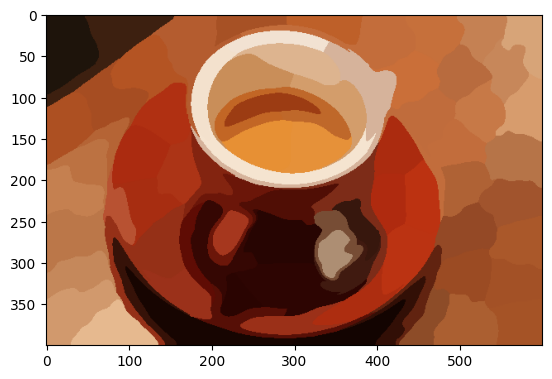

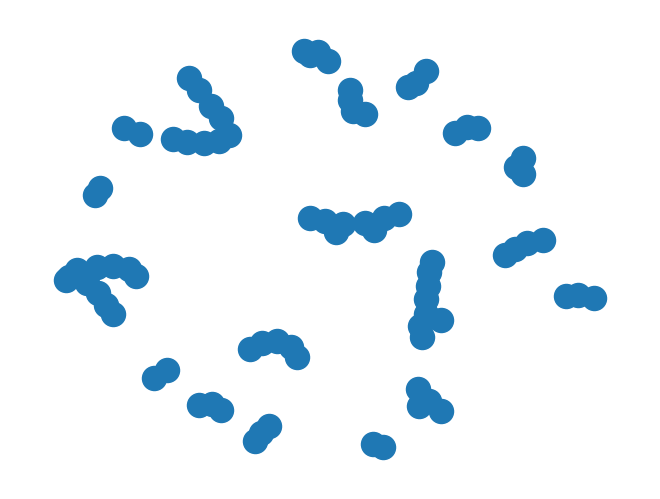

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, segmentation, color
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load an example image
image = data.coffee()

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=100, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels)

# Draw superpixels over original image
out1 = color.label2rgb(superpixels, image, kind='avg')
plt.imshow(out1)
plt.show()

# Prepare for KNN
# Flatten the superpixel connectivity graph 'g'
X = np.array([g.nodes[n]['mean color'] for n in g.nodes])

# Use superpixel label as target
y = np.array([n for n in g.nodes])

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a new graph using KNN
new_graph = nx.Graph()
for edge in knn.kneighbors(X, return_distance=False):
    new_graph.add_edge(edge[0], edge[1])




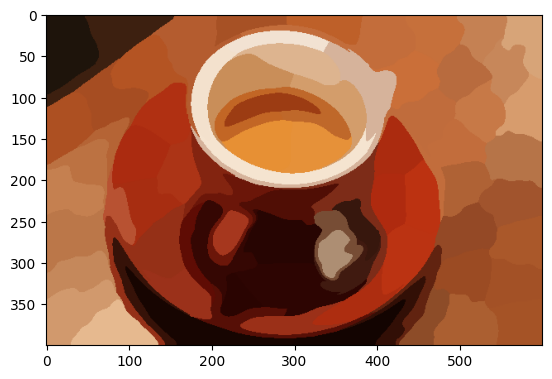

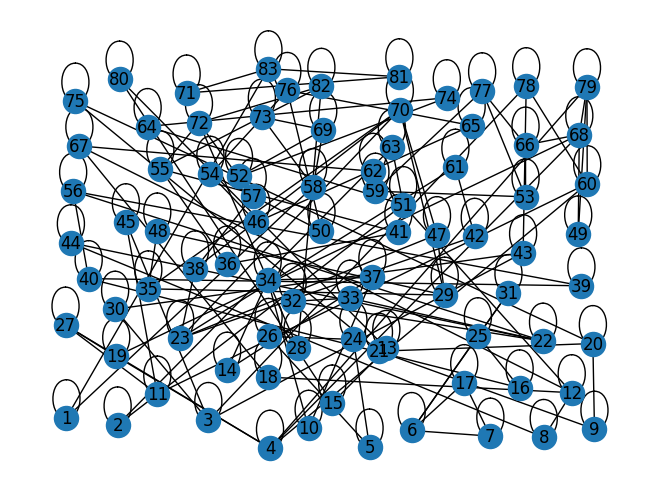

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, color
from skimage.measure import regionprops
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load an example image
image = data.coffee()

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=100, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels, mode = 'distance')

# Prepare for KNN
# Flatten the superpixel connectivity graph 'g'
X = np.array([g.nodes[n]['mean color'] for n in g.nodes])

# Use superpixel label as target
y = np.array([n for n in g.nodes])

# Store the centroid for each superpixel
centroids = {n: regionprops((n == superpixels).astype(int))[0].centroid for n in np.unique(superpixels)}

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a new graph using KNN
new_graph = nx.Graph()
for i, edges in enumerate(knn.kneighbors(X, return_distance=False)):
    for edge in edges:
        new_graph.add_edge(y[i], y[edge])

# Plot superpixels over original image
out1 = color.label2rgb(superpixels, image, kind='avg')
plt.imshow(out1)
plt.show()

# Plot new graph
nx.draw(new_graph, {n: centroids[n][::-1] for n in new_graph.nodes}, with_labels=True)
plt.show()


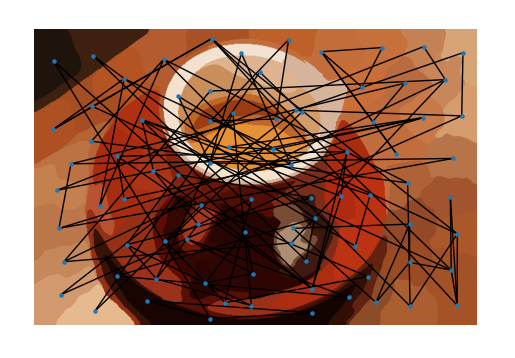

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, color
from skimage.measure import regionprops
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load an example image
image = data.coffee()

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=100, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels, mode='distance')

# Prepare for KNN
# Flatten the superpixel connectivity graph 'g'
X = np.array([g.nodes[n]['mean color'] for n in g.nodes])

# Use superpixel label as target
y = np.array([n for n in g.nodes])

# Store the centroid for each superpixel
centroids = {n: regionprops((n == superpixels).astype(int))[0].centroid for n in np.unique(superpixels)}

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a new graph using KNN
new_graph = nx.Graph()
for i, edges in enumerate(knn.kneighbors(X, return_distance=False)):
    for edge in edges:
        if y[i] != y[edge]:
            new_graph.add_edge(y[i], y[edge])

# Plot superpixels over original image
out1 = color.label2rgb(superpixels, image, kind='avg')
plt.imshow(out1)

# Plot new graph
nx.draw(new_graph, {n: centroids[n][::-1] for n in new_graph.nodes}, with_labels=False, node_size = 5)

# Show the plot
plt.show()


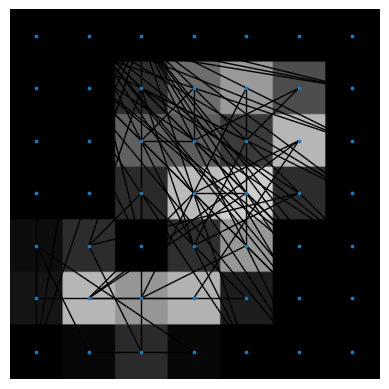

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, color
from skimage.measure import regionprops
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from skimage import io, color
from PIL import Image
from sklearn.neighbors import NearestNeighbors
# Load an example image
# image = data.coffee()
image = io.imread('/content/mnistsample.png') 
# image = Image.open("/content/mnistsample.png")#.convert('L')

# Convert the image to grayscale
# image_gray = color.rgb2gray(image)

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=50, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels, mode='similarity')

# Prepare for KNN
# Flatten the superpixel connectivity graph 'g'
X = np.array([g.nodes[n]['mean color'] for n in g.nodes])

# Use superpixel label as target
y = np.array([n for n in g.nodes])

# Store the centroid for each superpixel
centroids = {n: regionprops((n == superpixels).astype(int))[0].centroid for n in np.unique(superpixels)}

# Create KNN classifier based on pixel values
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a new graph using KNN
new_graph = nx.Graph()
for i, edges in enumerate(knn.kneighbors(X, return_distance=False)):
    for edge in edges:
        # Check if the edge is not a self-edge
        if y[i] != y[edge]:
            new_graph.add_edge(y[i], y[edge])

# Plot superpixels over original image
out1 = color.label2rgb(superpixels, image, kind='avg')
plt.imshow(out1)

# Plot new graph
nx.draw(new_graph, {n: centroids[n][::-1] for n in new_graph.nodes}, with_labels=False, node_size = 3)#, edge_color='white')

# Show the plot
plt.show()


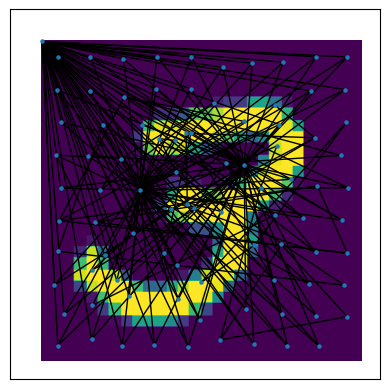

In [82]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, color
from sklearn.neighbors import NearestNeighbors
import numpy as np
from skimage import io, color
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from skimage.color import rgb2lab
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie2000
# Load an example image
# image = data.coffee()
image = io.imread('/content/mnistsample.png') 
dup = image.copy()
if len(image.shape) == 2:
    # Duplicate the single channel to create a three-channel image
    image = np.stack((image,) * 3, axis=-1)
# image = rgb2lab(image)

# Load an example image
# image = data.coffee()

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=100, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels)#, mode='ratio')

# Prepare for Nearest Neighbors
# Flatten the superpixel connectivity graph 'g'
X = []
for n in g.nodes:
    if 'mean color' in g.nodes[n]:
        X.append(g.nodes[n]['mean color'])

X = np.array(X)

n_superpixels = len(X)
color_diffs = np.zeros((n_superpixels, n_superpixels))
for i in range(n_superpixels):
    for j in range(n_superpixels):
        color1 = LabColor(*X[i])
        color2 = LabColor(*X[j])
        color_diffs[i, j] = delta_e_cie2000(color1, color2)


# Create Nearest Neighbors model
nn = NearestNeighbors(n_neighbors=1,algorithm='ball_tree')
nn.fit(X)

# Find nearest neighbors
distances, indices = nn.kneighbors(X)
threshold = 10
# Create a new graph using nearest neighbors
new_graph = nx.Graph()
# for i, neighbors in enumerate(indices):
#     for j, neighbor in enumerate(neighbors):
#         # Check if the neighbor is not the same as the current node
#         # and the color distance is below the threshold
#         if i != neighbor and distances[i][j] < 20:
#             new_graph.add_edge(i, neighbor)
for i in range(n_superpixels):
    # Get the indices of the nearest neighbors
    neighbors = np.argsort(color_diffs[i])[:3]  # Change the 3 to any number of neighbors you want
    for j in neighbors:
        # Check if the neighbor is not the same as the current node
        # and the color distance is below the threshold
        if i != j and color_diffs[i][j] < threshold:
            new_graph.add_edge(i, j)
# Calculate centroids manually
centroids = {}
for label in np.unique(superpixels):
    indices = np.nonzero(superpixels == label)
    centroid = np.mean(indices, axis=1)[::-1]
    centroids[label] = centroid

# Plot superpixels over original image
out1 = color.label2rgb(superpixels, dup, kind='avg')
plt.imshow(dup)

# Create the pos dictionary with default positions
pos = {n: [0, 0] for n in new_graph.nodes}

# Update the pos dictionary with centroid positions
for n in centroids:
    if n in new_graph.nodes:
        pos[n] = centroids[n]

# Plot new graph with filtered nodes
nx.draw_networkx(new_graph, pos=pos, with_labels=False,node_size = 5)

# Show the plot
plt.show()


In [86]:
from skimage import io, color, util, filters
import numpy as np
import networkx as nx
from sklearn.neighbors import NearestNeighbors

# load and binarize the image
image = io.imread("/content/mnistsample.png")
if len(image.shape) == 2:
    # Duplicate the single channel to create a three-channel image
    image = np.stack((image,) * 3, axis=-1)
image = color.rgb2gray(image)  # convert the image to grayscale
image = util.invert(image)  # invert the image
binary_image = image > filters.threshold_otsu(image)  # binarize the image

# create an empty graph
G = nx.Graph()

# add a node for each pixel in the image
for (x, y), value in np.ndenumerate(binary_image):
    G.add_node((x, y), binary=value)

# create a list of white pixel coordinates
white_pixels = np.argwhere(binary_image == 1)

# create a KNN object
neigh = NearestNeighbors(n_neighbors=5)

# fit the KNN object to the white pixel coordinates
neigh.fit(white_pixels)

# for each white pixel, connect it to its K nearest white pixel neighbors
# for each white pixel, connect it to its K nearest white pixel neighbors
for pixel in white_pixels:
    distances, indices = neigh.kneighbors([pixel])
    for idx, neighbor_idx in enumerate(indices[0]):
        neighbor = white_pixels[neighbor_idx]
        # use distance as weight (smaller distance -> larger weight)
        weight = 1 / distances[0][idx] if distances[0][idx] != 0 else 1
        G.add_edge(tuple(pixel), tuple(neighbor), weight=weight)



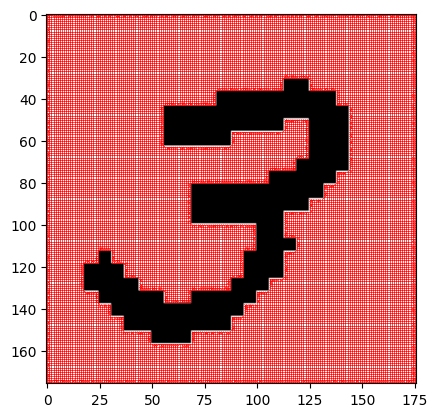

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(binary_image, cmap=plt.cm.gray)

# Iterate over edges and plot lines
for edge in G.edges(data=True):
    x1, y1 = edge[0]
    x2, y2 = edge[1]
    ax.plot([y1, y2], [x1, x2], 'r-', linewidth=0.5)

plt.show()

In [96]:
from skimage import io, color, util, filters, segmentation, measure
import numpy as np
import networkx as nx
from sklearn.neighbors import NearestNeighbors

# load and binarize the image
image = io.imread("/content/mnistsample.png")
if len(image.shape) == 2:
    image = np.stack((image,) * 3, axis=-1)
image = color.rgb2gray(image)  # convert the image to grayscale
image = util.invert(image)  # invert the image
binary_image = image > filters.threshold_otsu(image)  # binarize the image

# Perform SLIC on the binary image to get superpixels
segments_slic = segmentation.slic(binary_image.astype('double'), n_segments=100, compactness=10)

# create an empty graph
G = nx.Graph()

# A list to hold the representative coordinates for each superpixel
superpixel_coords = []

# For each superpixel
for superpixel in np.unique(segments_slic):
    # Get all pixels in the current superpixel
    superpixel_pixels = np.argwhere(segments_slic == superpixel)
    
    # Calculate the centroid of the superpixel
    centroid = superpixel_pixels.mean(axis=0)
    
    # Add the centroid as a node to the graph
    G.add_node(tuple(centroid), binary=np.any(binary_image[tuple(superpixel_pixels.T)]))
    
    # Add the centroid to the list of superpixel coordinates
    superpixel_coords.append(centroid)

# create a KNN object
neigh = NearestNeighbors(n_neighbors=5)

# fit the KNN object to the superpixel coordinates
neigh.fit(superpixel_coords)

# for each superpixel, connect it to its K nearest superpixel neighbors
for superpixel_coord in superpixel_coords:
    distances, indices = neigh.kneighbors([superpixel_coord])
    for idx, neighbor_idx in enumerate(indices[0]):
        neighbor = superpixel_coords[neighbor_idx]

        if np.array_equal(superpixel_coord, neighbor):
            continue
        # use distance as weight (smaller distance -> larger weight)

        weight = 1 / distances[0][idx] if distances[0][idx] != 0 else 1
        G.add_edge(tuple(superpixel_coord), tuple(neighbor), weight=weight)


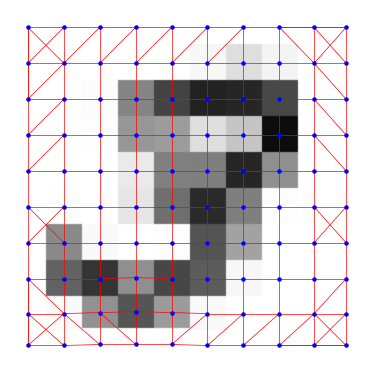

In [94]:
from skimage import color
import matplotlib.pyplot as plt

# colorize the superpixels in the image
out1 = color.label2rgb(segments_slic, image, kind='avg')
plt.imshow(out1)

# Create the pos dictionary with default positions
pos = {n: (n[1], n[0]) for n in G.nodes}

# Draw the graph on top of the image
nx.draw(G, pos=pos, node_size=5, edge_color='r', width=0.5, with_labels=False, node_color='b')

# Show the plot
plt.show()


In [56]:
!pip install colormath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39409 sha256=410d648685f247bfd0b03f98291902c29bb117ce3d5a08d646671e5f1381a614
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


In [110]:
from skimage import io, color, util, filters, segmentation, measure
import numpy as np
import networkx as nx
from sklearn.neighbors import NearestNeighbors

# load and binarize the image
image = io.imread("/content/mnistsample.png")
if len(image.shape) == 2:
    image = np.stack((image,) * 3, axis=-1)
image = color.rgb2gray(image)  # convert the image to grayscale
image = util.invert(image)  # invert the image
binary_image = image > filters.threshold_otsu(image)  # binarize the image

# Perform SLIC on the binary image to get superpixels
segments_slic = segmentation.slic(binary_image.astype('double'), n_segments=50)

# create an empty graph
G = nx.Graph()

# A list to hold the representative coordinates for each superpixel
superpixel_coords = []
# For each superpixel
superpixel_avgs = []
for superpixel in np.unique(segments_slic):
    # Get all pixels in the current superpixel
    superpixel_pixels = np.argwhere(segments_slic == superpixel)
    
    # Calculate the average pixel value of the superpixel
    avg_value = binary_image[tuple(superpixel_pixels.T)].mean()
    centroid = superpixel_pixels.mean(axis=0)
    
    # Add the centroid as a node to the graph
    G.add_node(tuple(centroid), binary=np.any(binary_image[tuple(superpixel_pixels.T)]))
    
    # Add the centroid to the list of superpixel coordinates
    superpixel_coords.append(centroid)
    
    # Store the average value
    superpixel_avgs.append(avg_value)

# Reshape the list of averages into a 2D array
X = np.array(superpixel_avgs).reshape(-1, 1)

# Create and fit the KNN object
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X)

# For each superpixel
for superpixel_coord, superpixel_avg in zip(superpixel_coords, superpixel_avgs):
    # Get the neighbors for the current superpixel's average pixel value
    distances, indices = neigh.kneighbors([[superpixel_avg]])
    
    # For each neighbor
    for idx, neighbor_idx in enumerate(indices[0]):
        neighbor_coord = superpixel_coords[neighbor_idx]
        
        # Skip if this is a self-loop
        if np.array_equal(superpixel_coord, neighbor_coord):
            continue
        
        # Use distance as weight (smaller distance -> larger weight)
        weight = 1 / distances[0][idx] if distances[0][idx] != 0 else 1
        
        # Add an edge between the current superpixel and the neighbor
        G.add_edge(tuple(superpixel_coord), tuple(neighbor_coord), weight=weight)


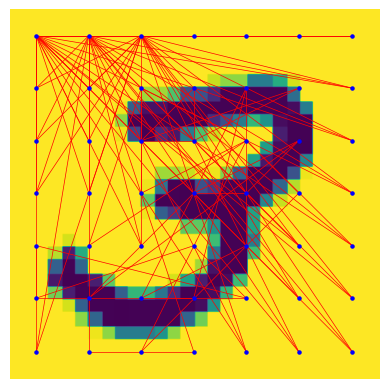

In [111]:
from skimage import color
import matplotlib.pyplot as plt

# colorize the superpixels in the image
out1 = color.label2rgb(segments_slic, image, kind='avg')
plt.imshow(image)

# Create the pos dictionary with default positions
pos = {n: (n[1], n[0]) for n in G.nodes}

# Draw the graph on top of the image
nx.draw(G, pos=pos, node_size=5, edge_color='r', width=0.5, with_labels=False, node_color='b')

# Show the plot
plt.show()